**ANÁLISIS DESCRIPTIVO**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import levene

In [2]:
df = pd.read_excel('resultados.xlsx')
df

,Optimizador,Tiempo,Mean
0,ADAM,1224,10.34
1,ADAM,923,11.54
2,ADAM,912,12.11
3,ADAM,987,8.81
4,ADAM,1051,17.87
5,ADAM,1144,12.83
6,ADAM,1235,13.23
7,ADAM,1003,11.74
8,ADAM,992,11.54
9,ADAM,909,13.08


ANÁLISIS GLOBAL DEL TIEMPO

In [3]:
media_tiempo = df['Tiempo'].mean()
desviacion_tiempo = df['Tiempo'].std()
varianza_tiempo = df['Tiempo'].var()
maximo_tiempo = df['Tiempo'].max()
minimo_tiempo = df['Tiempo'].min()

In [4]:
print('Media tiempo:',media_tiempo)
print('Desviacion tiempo:',desviacion_tiempo)
print('Varianza tiempo:',varianza_tiempo)
print('Maximo tiempo:',maximo_tiempo)
print('Minimo tiempo:',minimo_tiempo)


Media tiempo: 734.65
Desviacion tiempo: 200.8841418866568
Varianza tiempo: 40354.43846153846
Maximo tiempo: 1235
Minimo tiempo: 498


ANÁLISIS GLOBAL DE LA ACCURACY

In [5]:
media_accuracy = df['Mean'].mean()
desviacion_accuracy = df['Mean'].std()
varianza_accuracy = df['Mean'].var()
maximo_accuracy = df['Mean'].max()
minimo_accuracy = df['Mean'].min()

In [6]:
print('Media accuracy:',media_accuracy)
print('Desviacion accuracy:',desviacion_accuracy)
print('Varianza accuracy:',varianza_accuracy)
print('Maximo accuracy:',maximo_accuracy)
print('Minimo accuracy:',minimo_accuracy)

Media accuracy: 36.1625
Desviacion accuracy: 37.47272312236099
Varianza accuracy: 1404.204978205128
Maximo accuracy: 100.0
Minimo accuracy: 8.81


ANÁLISIS INDIVIDUAL TIEMPO

In [7]:
grupo_optimizador = df.groupby('Optimizador')
media_por_optimizador = grupo_optimizador.mean()

# Aplica múltiples funciones agregadas usando el método agg
resultados_agregados = grupo_optimizador.agg({
    'Tiempo': ['mean', 'std', 'var', 'max', 'min']
})

# Imprime el resultado
print(resultados_agregados)

             Tiempo                                     
               mean         std           var   max  min
Optimizador                                             
ADAGRAD       610.3   56.641269   3208.233333   696  520
ADAM         1038.0  123.150315  15166.000000  1235  909
RMSPROP       730.5   47.223464   2230.055556   832  676
SDG           559.8   29.146374    849.511111   611  498


ANÁLISIS INDIVIDUAL ACCURACY

In [8]:
# Aplica múltiples funciones agregadas usando el método agg
resultados_agregados2 = grupo_optimizador.agg({
    'Mean': ['mean', 'std', 'var', 'max', 'min']
})

# Imprime el resultado
print(resultados_agregados2)

                Mean                                    
                mean       std       var     max     min
Optimizador                                             
ADAGRAD      100.000  0.000000  0.000000  100.00  100.00
ADAM          12.309  2.364198  5.589432   17.87    8.81
RMSPROP       19.339  2.820845  7.957166   25.02   16.13
SDG           13.002  0.783650  0.614107   14.45   11.92


GRÁFICOS BOXPLOT (TIEMPO & ACCURACY)  Y SCATTERPLOT

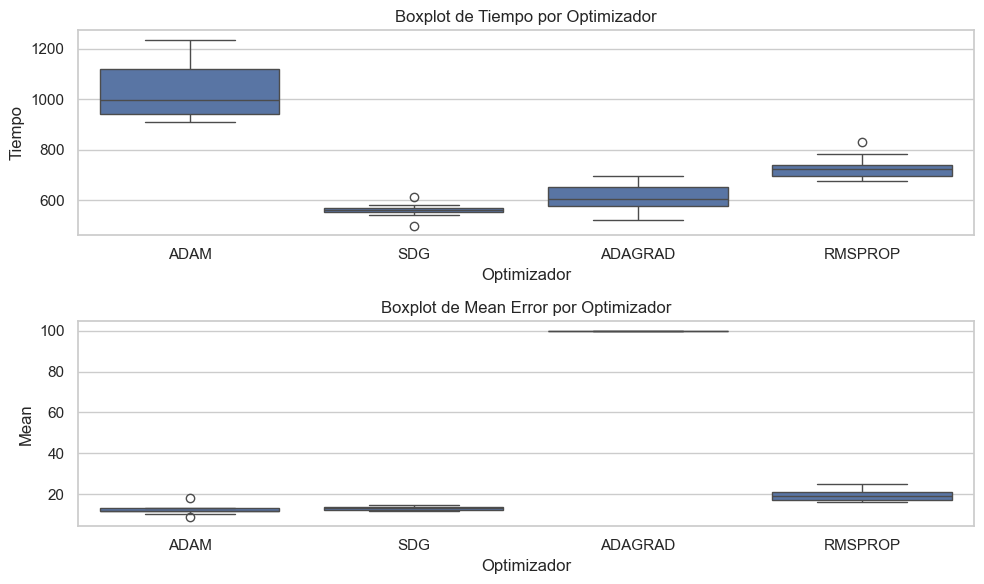

In [9]:
# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crea un diagrama de cajas para la variable 'Tiempo'
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
sns.boxplot(x='Optimizador', y='Tiempo', data=df)
plt.title('Boxplot de Tiempo por Optimizador')

# Crea un diagrama de cajas para la variable 'Mean'
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
sns.boxplot(x='Optimizador', y='Mean', data=df)
plt.title('Boxplot de Mean Error por Optimizador')

# Ajusta el diseño del gráfico
plt.tight_layout()

# Muestra el gráfico
plt.show()

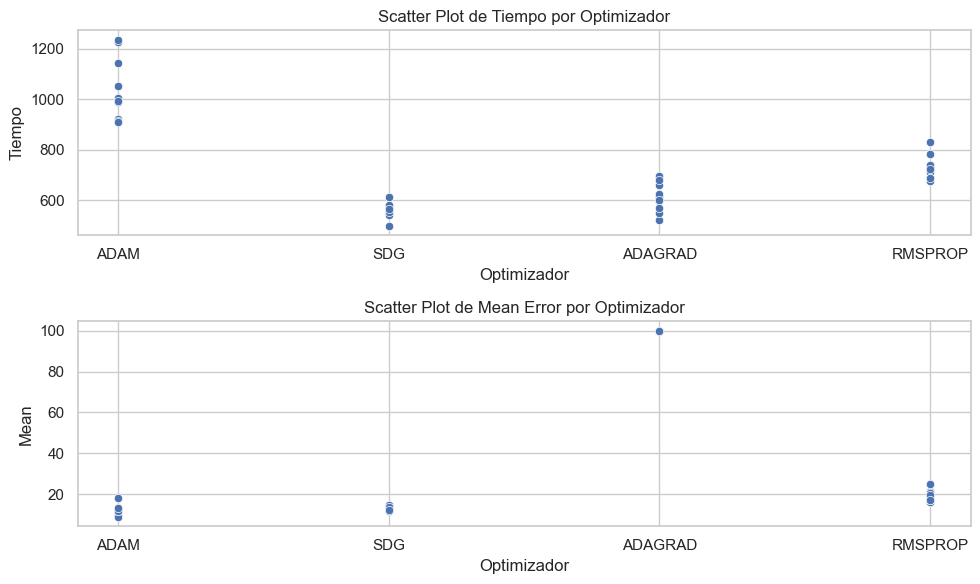

In [10]:
# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crea un gráfico de dispersión para la variable 'Tiempo'
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
sns.scatterplot(x='Optimizador', y='Tiempo', data=df)
plt.title('Scatter Plot de Tiempo por Optimizador')

# Crea un gráfico de dispersión para la variable 'Mean'
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
sns.scatterplot(x='Optimizador', y='Mean', data=df)
plt.title('Scatter Plot de Mean Error por Optimizador')

# Ajusta el diseño del gráfico
plt.tight_layout()

# Muestra el gráfico
plt.show()


RESIDUOS

                     sum_sq    df            F        PR(>F)
C(Optimizador)  54636.54781   3.0  5144.428422  1.956484e-47
Residual          127.44634  36.0          NaN           NaN


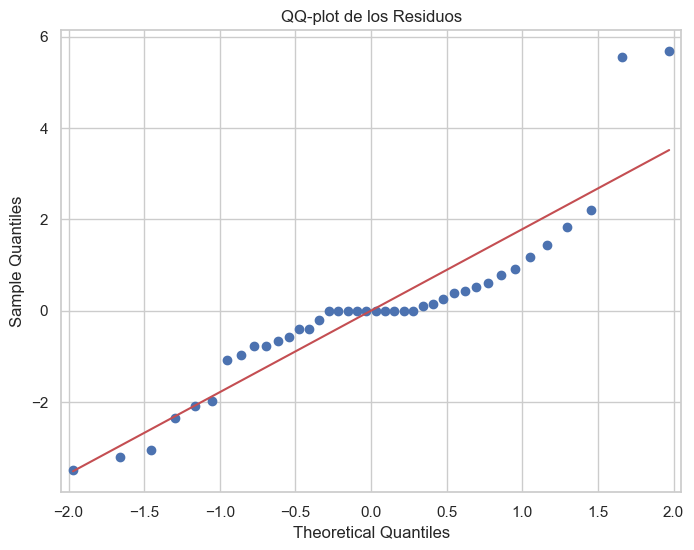

In [11]:
# Importing library
modelo_anova = sm.formula.ols('Mean ~ C(Optimizador)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprime la tabla ANOVA
print(anova_table)

# Calcula los residuos
residuos = modelo_anova.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos')

# Muestra el gráfico
plt.show()

In [12]:
anova_table

,sum_sq,df,F,PR(>F)
C(Optimizador),54636.54781,3.0,5144.428422,1.956484e-47
Residual,127.44634,36.0,NaN,NaN


                   sum_sq    df           F        PR(>F)
C(Optimizador)  29.294660   3.0  683.139161  8.981837e-32
Residual         0.514589  36.0         NaN           NaN


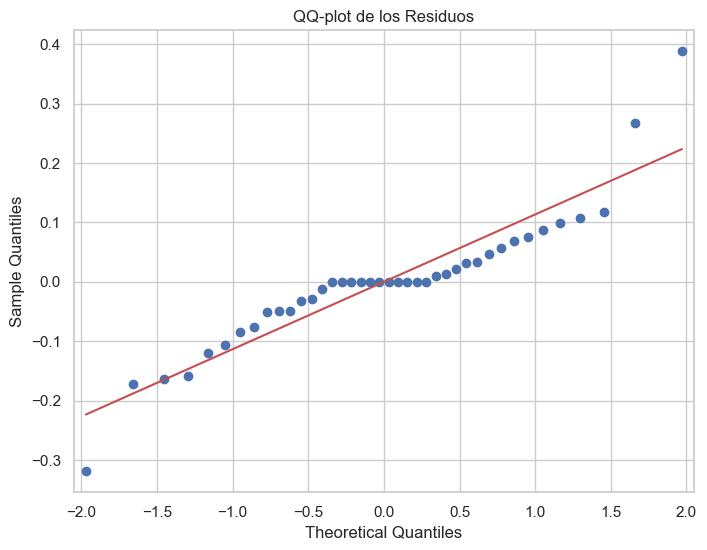

In [13]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Aplica logaritmo a la variable 'Mean'
df['Mean_log'] = np.log(df['Mean'])

# Realiza el modelo ANOVA con la variable transformada
modelo_anova = sm.formula.ols('Mean_log ~ C(Optimizador)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprime la tabla ANOVA
print(anova_table)

# Calcula los residuos
residuos = modelo_anova.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos')

# Muestra el gráfico
plt.show()


In [14]:
anova_table

,sum_sq,df,F,PR(>F)
C(Optimizador),29.294660,3.0,683.139161,8.981837e-32
Residual,0.514589,36.0,NaN,NaN


                   sum_sq    df          F        PR(>F)
C(Optimizador)  1380738.9   3.0  85.811614  1.821283e-16
Residual         193084.2  36.0        NaN           NaN


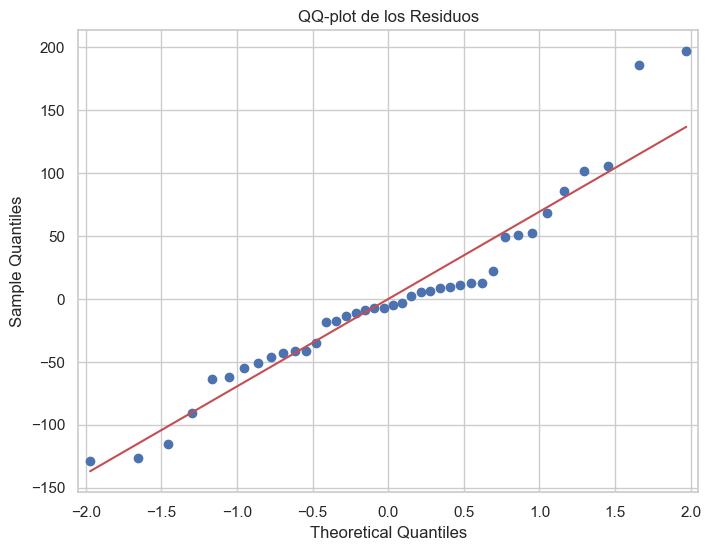

In [15]:
# Importing library
modelo_anova = sm.formula.ols('Tiempo ~ C(Optimizador)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprime la tabla ANOVA
print(anova_table)

# Calcula los residuos
residuos = modelo_anova.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos')

# Muestra el gráfico
plt.show()

In [16]:
anova_table

,sum_sq,df,F,PR(>F)
C(Optimizador),1380738.9,3.0,85.811614,1.821283e-16
Residual,193084.2,36.0,NaN,NaN


                  sum_sq    df           F        PR(>F)
C(Optimizador)  2.215024   3.0  102.307642  1.112074e-17
Residual        0.259807  36.0         NaN           NaN


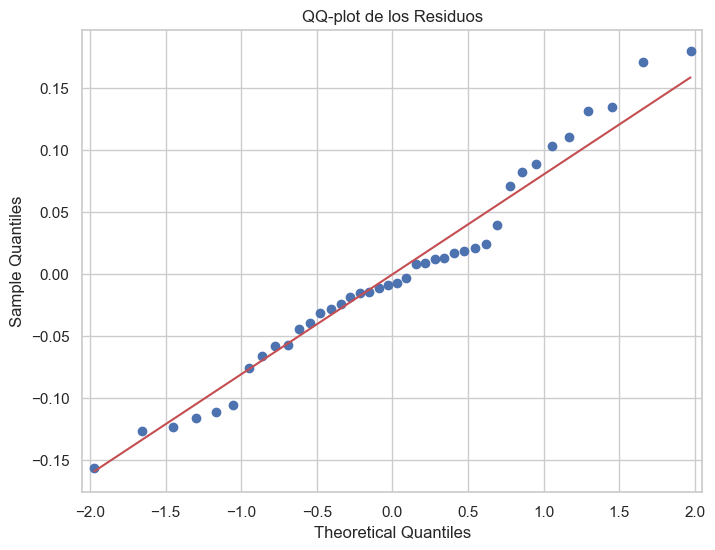

In [17]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que la variable que deseas transformar es 'Tiempo'
df['Tiempo_log'] = np.log(df['Tiempo'])

# Realiza el modelo ANOVA con la variable transformada
modelo_anova = sm.formula.ols('Tiempo_log ~ C(Optimizador)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprime la tabla ANOVA
print(anova_table)

# Calcula los residuos
residuos = modelo_anova.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos')

# Muestra el gráfico
plt.show()


In [18]:
anova_table

,sum_sq,df,F,PR(>F)
C(Optimizador),2.215024,3.0,102.307642,1.112074e-17
Residual,0.259807,36.0,NaN,NaN


In [19]:
df

,Optimizador,Tiempo,Mean,Mean_log,Tiempo_log
0,ADAM,1224,10.34,2.336020,7.109879
1,ADAM,923,11.54,2.445819,6.827629
2,ADAM,912,12.11,2.494032,6.815640
3,ADAM,987,8.81,2.175887,6.894670
4,ADAM,1051,17.87,2.883123,6.957497
5,ADAM,1144,12.83,2.551786,7.042286
6,ADAM,1235,13.23,2.582487,7.118826
7,ADAM,1003,11.74,2.463002,6.910751
8,ADAM,992,11.54,2.445819,6.899723
9,ADAM,909,13.08,2.571084,6.812345


ESTADÍSTICOS

In [20]:
# Agrupa los datos por el factor 'Optimizador'
grupos_log = [df['Mean_log'][df['Optimizador'] == optimizador] for optimizador in df['Optimizador'].unique()]

# Realiza la prueba de Levene para homogeneidad de varianza con los datos transformados
estadistico_levene_log, p_valor_log = levene(*grupos_log)

# Imprime los resultados
print("Estadístico de Levene (con logaritmo):", estadistico_levene_log)
print("Valor p (con logaritmo):", p_valor_log)

# Evalúa la significancia estadística del resultado
nivel_significancia = 0.05
if p_valor_log < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas (con logaritmo).")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son homogéneas (con logaritmo).")

Estadístico de Levene (con logaritmo): 5.567104194813308
Valor p (con logaritmo): 0.0030406054265721587
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas (con logaritmo).


In [21]:
grupos = [df['Tiempo_log'][df['Optimizador'] == optimizador] for optimizador in df['Optimizador'].unique()]

# Realiza la prueba de Levene para homogeneidad de varianza
estadistico_levene, p_valor = levene(*grupos)

# Imprime los resultados
print("Estadístico de Levene:", estadistico_levene)
print("Valor p:", p_valor)

# Evalúa la significancia estadística del resultado
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son homogéneas.")

Estadístico de Levene: 2.006490866015712
Valor p: 0.1304137847987501
No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son homogéneas.


In [22]:
df

,Optimizador,Tiempo,Mean,Mean_log,Tiempo_log
0,ADAM,1224,10.34,2.336020,7.109879
1,ADAM,923,11.54,2.445819,6.827629
2,ADAM,912,12.11,2.494032,6.815640
3,ADAM,987,8.81,2.175887,6.894670
4,ADAM,1051,17.87,2.883123,6.957497
5,ADAM,1144,12.83,2.551786,7.042286
6,ADAM,1235,13.23,2.582487,7.118826
7,ADAM,1003,11.74,2.463002,6.910751
8,ADAM,992,11.54,2.445819,6.899723
9,ADAM,909,13.08,2.571084,6.812345


NO CONSEGUIMOS HOMOGENOIDAD EN CUANDO AL MEAN.... BÚSQUEDA DE ALTERNATIVAS

Valor óptimo de lambda: -0.986295888449608
                  sum_sq    df         F        PR(>F)
C(Optimizador)  0.036497   3.0  152.8611  1.550936e-20
Residual        0.002865  36.0       NaN           NaN


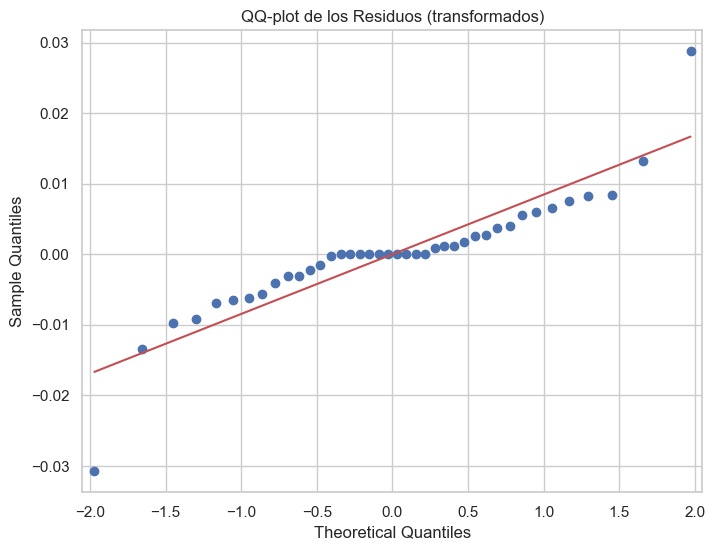

In [23]:
import numpy as np
from scipy.stats import boxcox
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'Mean' es la variable que deseas transformar
original_data = df['Mean']

# Aplica la transformación de Box-Cox
transformed_data, lambda_value = boxcox(original_data)

# Imprime el valor óptimo de lambda
print("Valor óptimo de lambda:", lambda_value)

# Actualiza el DataFrame con los datos transformados
df['Mean_transformed'] = transformed_data

# Realiza el modelo ANOVA con los datos transformados
modelo_anova_transformado = sm.formula.ols('Mean_transformed ~ C(Optimizador)', data=df).fit()
anova_table_transformado = sm.stats.anova_lm(modelo_anova_transformado, typ=2)

# Imprime la tabla ANOVA para los datos transformados
print(anova_table_transformado)

# Calcula los residuos para el modelo transformado
residuos_transformados = modelo_anova_transformado.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos transformados
sm.qqplot(residuos_transformados, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos (transformados)')

# Muestra el gráfico
plt.show()


                  sum_sq    df           F        PR(>F)
C(Optimizador)  0.033435   3.0  150.264604  2.062697e-20
Residual        0.002670  36.0         NaN           NaN


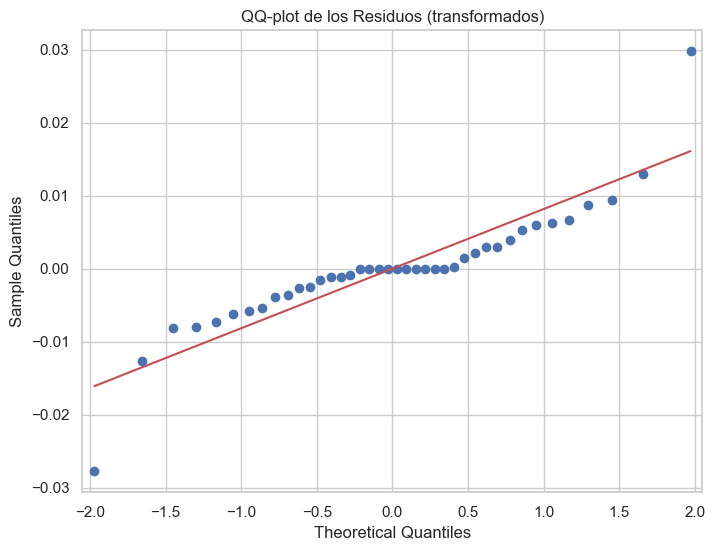

In [24]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'Mean' es la variable que deseas transformar
original_data = df['Mean']

# Aplica la transformación de recíproco
transformed_data = np.reciprocal(original_data)

# Actualiza el DataFrame con los datos transformados
df['Mean_transformed'] = transformed_data

# Realiza el modelo ANOVA con los datos transformados
modelo_anova_transformado = sm.formula.ols('Mean_transformed ~ C(Optimizador)', data=df).fit()
anova_table_transformado = sm.stats.anova_lm(modelo_anova_transformado, typ=2)

# Imprime la tabla ANOVA para los datos transformados
print(anova_table_transformado)

# Calcula los residuos para el modelo transformado
residuos_transformados = modelo_anova_transformado.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos transformados
sm.qqplot(residuos_transformados, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos (transformados)')

# Muestra el gráfico
plt.show()


In [25]:
import numpy as np
from scipy.stats import levene, boxcox
import pandas as pd

# Asumiendo que 'Mean' es la variable que deseas transformar
original_mean = df['Mean']

# Aplica la transformación de Box-Cox
transformed_mean, lambda_value = boxcox(original_mean)

# Actualiza el DataFrame con los datos transformados
df['Mean_transformed'] = transformed_mean

# Agrupa los datos transformados por el factor 'Optimizador'
grupos_transformados = [df['Mean_transformed'][df['Optimizador'] == optimizador] for optimizador in df['Optimizador'].unique()]

# Realiza la prueba de Levene para homogeneidad de varianza con los datos transformados
estadistico_levene_transformado, p_valor_transformado = levene(*grupos_transformados)

# Imprime los resultados
print("Estadístico de Levene (con transformación de Box-Cox):", estadistico_levene_transformado)
print("Valor p (con transformación de Box-Cox):", p_valor_transformado)

# Evalúa la significancia estadística del resultado
nivel_significancia = 0.05
if p_valor_transformado < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas (con transformación).")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son homogéneas (con transformación).")


Estadístico de Levene (con transformación de Box-Cox): 5.322279382500516
Valor p (con transformación de Box-Cox): 0.003863056546751022
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas (con transformación).


Estadístico de Levene (con transformación de reciprocidad): 5.3222147544279546
Valor p (con transformación de reciprocidad): 0.003863302128553799


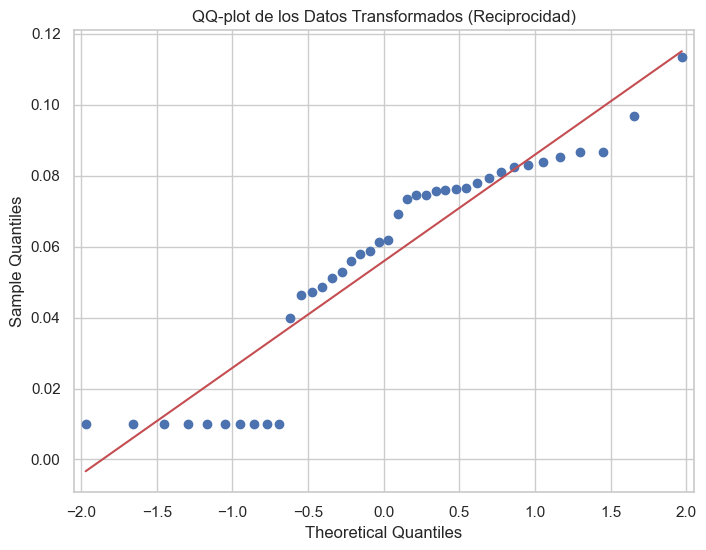

In [26]:
import numpy as np
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'Mean' es la variable que deseas transformar
original_mean = df['Mean']

# Aplica la transformación de reciprocidad
transformed_mean_reciprocal = 1 / original_mean

# Agrega la columna de datos transformados al DataFrame
df['Mean_transformed_reciprocal'] = transformed_mean_reciprocal

# Agrupa los datos transformados por el factor 'Optimizador'
grupos_transformados_reciprocal = [df['Mean_transformed_reciprocal'][df['Optimizador'] == optimizador] for optimizador in df['Optimizador'].unique()]

# Realiza la prueba de Levene para homogeneidad de varianza con los datos transformados
estadistico_levene_transformado_reciprocal, p_valor_transformado_reciprocal = levene(*grupos_transformados_reciprocal)

# Imprime los resultados
print("Estadístico de Levene (con transformación de reciprocidad):", estadistico_levene_transformado_reciprocal)
print("Valor p (con transformación de reciprocidad):", p_valor_transformado_reciprocal)

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los datos transformados
sm.qqplot(transformed_mean_reciprocal, line='s', ax=plt.gca())
plt.title('QQ-plot de los Datos Transformados (Reciprocidad)')

# Muestra el gráfico
plt.show()


In [27]:
df

,Optimizador,Tiempo,Mean,Mean_log,Tiempo_log,Mean_transformed,Mean_transformed_reciprocal
0,ADAM,1224,10.34,2.336020,7.109879,0.912649,0.096712
1,ADAM,923,11.54,2.445819,6.827629,0.923041,0.086655
2,ADAM,912,12.11,2.494032,6.815640,0.927260,0.082576
3,ADAM,987,8.81,2.175887,6.894670,0.895327,0.113507
4,ADAM,1051,17.87,2.883123,6.957497,0.954871,0.055960
5,ADAM,1144,12.83,2.551786,7.042286,0.932057,0.077942
6,ADAM,1235,13.23,2.582487,7.118826,0.934498,0.075586
7,ADAM,1003,11.74,2.463002,6.910751,0.924567,0.085179
8,ADAM,992,11.54,2.445819,6.899723,0.923041,0.086655
9,ADAM,909,13.08,2.571084,6.812345,0.933600,0.076453
